# Day 2: GPS data

## Fitting a model to data

### Day 2 modules includes:
1. Making plots
2. **Fitting lines**
3. Application of GPS timeseries data 


## 1. Fitting a line to data

Let's generate some noisy data that loosely follows a line:

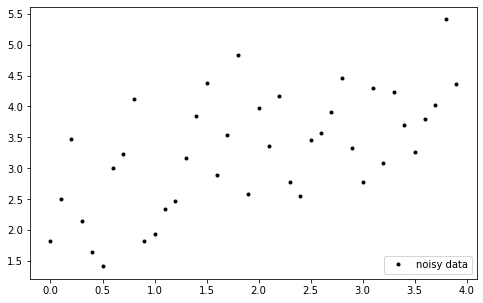

In [2]:
# create some noisy data
import numpy as np
import matplotlib.pyplot as plt

# first, create the time steps along the x axis: every 0.1 years for 4 years
x = np.arange(0,4,step=0.1)

# generate some noise with the same size as 'x'
noise = np.random.normal(size=np.shape(x))

# create a 'true' model with parameters a_true and b_true. These are the 'hidden' values we want to know
a_true = 5*np.random.rand()
b_true = 5*np.random.rand()

# create the y-values and add some noise.
# Question: how does the data look if you take out the noise?
y = a_true + b_true * x + noise

plt.figure(figsize=(8,5))
plt.plot(x,y,'k.',label='noisy data')
plt.legend(loc='lower right')
plt.show()

#### Assignment: Try to fit the data by hand by guessing the values of a and b until the model looks good.

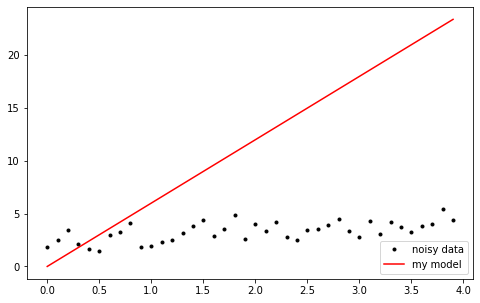

In [3]:
a=0
b=6
model = a + b*x

plt.figure(figsize=(8,5))
plt.plot(x,y,'k.',label='noisy data')
plt.plot(x,model,'-r',label='my model')
plt.legend(loc='lower right')
plt.show()

How close did you get?

In [4]:
print("I estimated ", a, " for a, the true value was ", a_true)
print("I estimated ", b, " for b, the true value was ", b_true)

I estimated  0  for a, the true value was  2.392405530005275
I estimated  6  for b, the true value was  0.3876928052830686


## 1a. Special: Interactive plots!

To run this part, we may need to install a few more things. If the code block below does not work, open up the anaconda prompt (on Windows, search for anaconda prompt from the taskbar; on Linux/Mac, just use a regular terminal window), and run the following commands:

    conda install nodejs
    conda install -c conda-forge ipywidgets
    jupyter labextension install @jupyter-widgets/jupyterlab-manager


In [5]:
# import statement for an interactive plot
from ipywidgets import interactive
import my_interactive_line

# we use a random seed to change the random result that we get each time we run the code.
# we have to put this outside the function 
np.random.seed()
rseed = np.random.randint(100)
print(rseed)

def plot_interactive_line(numdata=20, a=2., b=2., noiselevel=2.):

    # User-defined model:
    xmax=10
    x = np.linspace(-xmax, xmax, int(100*xmax))
    y = a + b*x
 
    # create random noisy data
    # get a random a between (0,5) and b between (0,5)
    np.random.seed(rseed)
    a_true = -20 + 40 * np.random.rand()
    b_true = -5 + 10 * np.random.rand()
    
    # create some synthetic GPS locations
    xdata = np.linspace(-0.9*xmax,0.9*xmax,numdata) + np.random.normal(loc=0,scale=1,size=numdata)
    
    # create the synthetic model
    ymodel = a_true + b_true * xdata
    
    #add gaussian noise: mean of 0, standard deviation of 'noiselevel'
    ynoise = np.random.normal(loc=0,scale=noiselevel,size=numdata)
    
    #get the final 'observed' data
    ydata = ymodel + ynoise
    
    # compute the model from the input parameters
    ydata_predicted = a + b*xdata
    
    # compute the total misfit ('chi-squared' statistic): 
    # this is the sum of the misfits, divided by number of data and the data noise
    chi_squared = np.sum( (ydata - ydata_predicted)**2 )/(numdata*noiselevel**2)
    
    # prepare the plot
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    
    # prepare the axes limits
    ax.set_xlim((-xmax,xmax))
    ax.set_ylim((-50,50))
    
    #ax.plot(x, y, 'bx')
    points = ax.errorbar(xdata, ydata, fmt='ko', yerr=noiselevel, label='Data',capsize=2)
    lineref = ax.plot(x, y, 'b-',label = "Model: a=%.1f, b=%.1f"%(a,b))
    ax.text(-0.9*xmax,-45,'misfit = %.2f'%chi_squared)
    
    plt.setp(lineref, linewidth=2)
    plt.legend()
    plt.show()

    return a_true, b_true, xdata, ydata


# now, we create the interactive plot with the special jupyter commands interactive() and display(). 
w = interactive(plot_interactive_line, numdata=(1,100), a=(-20.,20.), b=(-5.,5.),noiselevel=(0.5,5.))
display(w)

73
44


interactive(children=(IntSlider(value=20, description='numdata', min=1), FloatSlider(value=2.0, description='a…

How close did you get this time?

In [6]:
print("The true value of a was ", w.result[0])
print("The true value of b was ", w.result[1])

The true value of a was  13.393685946625979
The true value of b was  -3.9520389563013025


## 2. Fitting the data with python automatically

Since least-squares fitting is such a common activity, there are nice, easy functions in python to do it. Let's use one:

In [7]:
import scipy.optimize

[2.34803097 0.48466708]


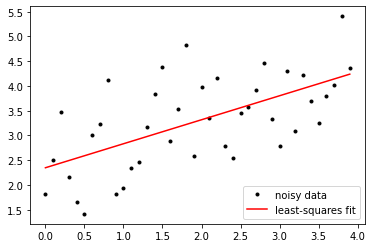

In [8]:
# for this method, we define our linear model as a function. 
# The first argument is the x variable, and
# the rest of the arguments are the parameters to fit.

def my_line(x,a,b):
    return a + b*x

# here, p0 is the 'initial guess' for this method. 
# m is the model output, and mcov is the model covariance, or uncertainties.
m,mcov = scipy.optimize.curve_fit(my_line,x,y,p0=[0,0])
print(m)

y_predicted=my_line(x,m[0],m[1]) 

plt.plot(x,y,'k.',label='noisy data')
plt.plot(x,y_predicted, '-r', label='least-squares fit')
plt.legend(loc='lower right')

Assignment: here is some data that is not linear! It also has a step function, which we can model using the numpy function np.heaviside(). Can you modify the scipy function to fit all 3 parameters?

[10.01372353  1.99023374  4.0324359 ]


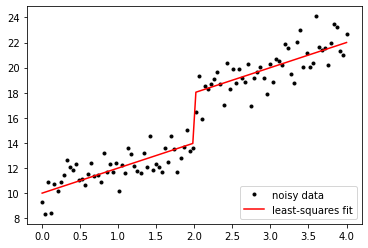

In [9]:
# the time of the offset
eqtime = 2

def my_function(x,a,b,c):
    return a + b*x + c*np.heaviside(x-eqtime,0.5)

x=np.linspace(0,4,100)

# define some 'true' values
a_true = 10
b_true = 2
c_true = 4


y_nonoise=my_function(x,a_true,b_true,c_true)
y = y_nonoise + np.random.normal(size=np.shape(x))


# Work here: use scipy.optimize.curve_fit here to create y_predicted
m,mcov = scipy.optimize.curve_fit(my_function,x,y)
print(m)
y_predicted=my_function(x,a_true,b_true,c_true)


plt.plot(x,y,'k.',label='noisy data')

# uncomment to make a plot of your result
plt.plot(x,y_predicted, '-r', label='least-squares fit')

plt.legend(loc='lower right')

## Bonus. Fitting a model with linear algebra

for the model function y=a*x+b, we can express this in matrix notation as follows:

    [y1] = [1  x1]  *  [a]
    [y2]   [1  x2]     [b]
    [y3]   [1  x3]
    [...]  [ ... ]  

The matrix on the left is an Nx1 column of the y-values, and on the right we have an Nx2 matrix filled with first a column of ones, and then a column of the x-values, multiplied into the 2x1 matrix with the parameters we want to fit - a and b. The result of multiplying a [Nx2] with [2x1] matrix is [Nx1], so we can see that the matrix dimensions work. 

We can actually express *any* model that is a linear function of the parameters in this way; in Geophysics this is typically written as solving the problem $Gm=d$, where $G$ is our "design matrix" (in this case, filled with ones and x-values), $d$ is our "data" matrix of the measured y-values, and $m$ is the model parameters we want to estimate; in this case, the y-intercept $a$ and slope of the line $b$.

Using the theorems of linear algebra, we can show that the solution to the matrix problem $Gm=d$ can be written as $m=(G^TG)^{-1}G^Td$. This equation is scary to look at, but in the computer we can work it out pretty quickly.


#### Step 1. First we create our 'design matrix'. For a linear model, this is a column of ones, next to a column of the x-coordinate of the data:

In [10]:
col1 = np.ones(np.shape(x))
col2 = x
# use np.column_stack to line up arrays as columns in a matrix. There is a similar function for rows, np.row_stack.
G = np.column_stack( (col1,col2) )
print(G)

[[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]
 [1.         0.2020202 ]
 [1.         0.24242424]
 [1.         0.28282828]
 [1.         0.32323232]
 [1.         0.36363636]
 [1.         0.4040404 ]
 [1.         0.44444444]
 [1.         0.48484848]
 [1.         0.52525253]
 [1.         0.56565657]
 [1.         0.60606061]
 [1.         0.64646465]
 [1.         0.68686869]
 [1.         0.72727273]
 [1.         0.76767677]
 [1.         0.80808081]
 [1.         0.84848485]
 [1.         0.88888889]
 [1.         0.92929293]
 [1.         0.96969697]
 [1.         1.01010101]
 [1.         1.05050505]
 [1.         1.09090909]
 [1.         1.13131313]
 [1.         1.17171717]
 [1.         1.21212121]
 [1.         1.25252525]
 [1.         1.29292929]
 [1.         1.33333333]
 [1.         1.37373737]
 [1.         1.41414141]
 [1.         1.45454545]
 [1.         1.49494949]
 [1.         1.53535354]
 [1.         1.57575758]


Assignment: compute the best-fitting line! Recall our equation: 

$m=(G^TG)^{-1}G^Td$

Use the numpy commands for transpose and inverse:

    np.transpose()
    np.linalg.inv()
    
And, to multiply matrices, use the .dot() method of numpy arrays, like so:

    AtimesB = A.dot(B)

Look out for typos, it's a lot to type!

In [1]:
# solve the equation m = (G^T * G)^-1 * G^T *d
# step 1: define a new variable GT as the transpose of G


# step 2: define GTG as GT * G


# step 3: define GTGinv as GTG^-1


# step 4: GTGInvGT = GTGInv * GT


#step 5: get the final result, m, as GTGinvGT * y.


# print out the result, and compare to the true values from above.
print(m)
print(a_true,b_true)

NameError: name 'm' is not defined

Note, these values should be pretty close to our true values but not exactly - this is because we added noise! In general, the presence of noise means we will never be able to exactly measure the **true model** values. 

Now, let's plot the model on top of the data and see how it fits. Remember, we can get our "predicted" data (y-values of the model) with the equation $d = G * m$

In [2]:
data_predicted = 

plt.figure(figsize=(8,5))
plt.plot(x,y,'k.',label='noisy data')
plt.plot(x,data_predicted, '-r', label='least-squares fit')
plt.legend(loc='lower right')

SyntaxError: invalid syntax (<ipython-input-2-cf354579c07d>, line 1)